In [1]:
import requests
import json
import numpy as np
import twitter
import pandas as pd
import matplotlib.pyplot as plt
from twitter_keys import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET, sr_api

In [2]:
r = requests.get('http://api.sportradar.us/ncaamb/trial/v7/en/seasons/2019/REG/teams/b795ddbc-baab-4499-8803-52e8608520ab/statistics.json?api_key=' + sr_api)

In [3]:
auth = twitter.Api(consumer_key=CONSUMER_KEY,
                consumer_secret=CONSUMER_SECRET,
                access_token_key=ACCESS_TOKEN,
                access_token_secret=ACCESS_SECRET)

In [4]:
data = json.loads(r.text)

In [5]:
total = data['own_record']['total']

total_df = pd.DataFrame.from_dict(total, orient='index', columns=['Louisville season total'])

final_total_df = total_df.transpose()

final_total_df

,games_played,minutes,field_goals_made,field_goals_att,field_goals_pct,two_points_made,two_points_att,two_points_pct,three_points_made,three_points_att,...,fast_break_pts,flagrant_fouls,points_off_turnovers,second_chance_pts,ejections,foulouts,points_in_paint,efficiency,true_shooting_att,true_shooting_pct
Louisville season total,31.0,6250.0,810.0,1787.0,0.453,555.0,1108.0,0.501,255.0,679.0,...,230.0,1.0,390.0,352.0,0.0,2.0,916.0,2598.0,2040.44,0.563


In [6]:
av_total = data['own_record']['average']

av_df = pd.DataFrame.from_dict(av_total, orient='index', columns=['Louisville average/game'])

final_averages = av_df.transpose()

final_averages

,fast_break_pts,points_off_turnovers,second_chance_pts,minutes,points,off_rebounds,def_rebounds,rebounds,assists,steals,...,field_goals_att,three_points_made,three_points_att,free_throws_made,free_throws_att,two_points_made,two_points_att,points_in_paint,efficiency,true_shooting_att
Louisville average/game,7.42,12.58,11.35,201.6,74.1,10.0,26.65,36.65,14.0,5.06,...,57.65,8.23,21.9,13.58,18.58,17.9,35.74,29.55,83.81,65.82


In [7]:
player_stats = data['players']

mems = np.arange(len(player_stats))

players = []

for player in mems:
    players.append(player_stats[player]['full_name'])
    
players

['Lamarr Kimble',
 'Josh Nickelberry',
 'Samuell Williamson',
 'Aidan Igiehon',
 "Jae'Lyn Withers",
 'Steven Enoch',
 'Hogan Orbaugh',
 'Grant Williams',
 'Keith Oddo',
 'Jordan Nwora',
 'Malik Williams',
 'David Johnson',
 'Darius Perry',
 'Quinn Slazinski',
 'Ryan McMahon',
 'Dwayne Sutton']

In [8]:
player_dict = {players[i]: player_stats[i] for i in range(len(players))} 

In [9]:
player_total_dict = []

for player in players:
    player_total_dict.append(player_dict[player]['total'])
    
df_ptd = pd.DataFrame.from_dict(player_total_dict)

df_ptd.index = players

dropees = df_ptd.transpose()

dropees_row = dropees.drop(["Jae'Lyn Withers", "Hogan Orbaugh", "Grant Williams", "Keith Oddo"], axis=1)

final_ptd = dropees_row.drop(["two_points_pct", "true_shooting_pct", "ejections", "foulouts", "true_shooting_att", "efficiency",
                             "flagrant_fouls", "tech_fouls"], axis=0)

final_ptd

df_ptd

,games_played,games_started,minutes,field_goals_made,field_goals_att,field_goals_pct,two_points_made,two_points_att,two_points_pct,three_points_made,...,blocks,personal_fouls,tech_fouls,points,flagrant_fouls,ejections,foulouts,true_shooting_att,true_shooting_pct,efficiency
Lamarr Kimble,31,17,669.0,56,156,0.359,40,98,0.408,16,...,3,43,0,156,0,0,0,174.04,0.448,155
Josh Nickelberry,15,0,55.0,2,10,0.200,0,3,0.000,2,...,0,3,0,12,0,0,0,12.64,0.475,7
Samuell Williamson,31,1,480.0,54,115,0.470,45,88,0.511,9,...,5,49,0,137,0,0,0,127.76,0.536,142
Aidan Igiehon,13,0,61.0,5,8,0.625,5,8,0.625,0,...,2,12,0,13,0,0,0,11.52,0.564,20
Jae'Lyn Withers,0,0,0.0,0,0,0.000,0,0,0.000,0,...,0,0,0,0,0,0,0,0.00,0.000,0
Steven Enoch,31,28,630.0,115,223,0.516,106,196,0.541,9,...,19,71,1,293,1,0,0,255.12,0.574,337
Hogan Orbaugh,4,0,4.0,0,0,0.000,0,0,0.000,0,...,0,2,0,0,0,0,0,0.00,0.000,0
Grant Williams,4,0,4.0,0,0,0.000,0,0,0.000,0,...,0,0,0,0,0,0,0,0.00,0.000,0
Keith Oddo,8,0,9.0,1,2,0.500,0,1,0.000,1,...,0,3,0,6,0,0,0,3.76,0.798,4
Jordan Nwora,31,30,1025.0,189,430,0.440,113,241,0.469,76,...,8,69,0,558,0,0,0,486.32,0.574,538


In [10]:
player_av_dict = []

for player in players:
    player_av_dict.append(player_dict[player]['average'])
    
df_pad = pd.DataFrame.from_dict(player_av_dict)

df_pad.index = players

to_drop_col = df_pad.transpose()

to_drop_row = to_drop_col.drop(["Jae'Lyn Withers", "Hogan Orbaugh", "Grant Williams", "Keith Oddo"], axis=1)

final_pad = to_drop_row.drop(["flagrant_fouls", "two_points_made", "two_points_att", "efficiency", "true_shooting_att"], axis=0)

final_pad

,Lamarr Kimble,Josh Nickelberry,Samuell Williamson,Aidan Igiehon,Steven Enoch,Jordan Nwora,Malik Williams,David Johnson,Darius Perry,Quinn Slazinski,Ryan McMahon,Dwayne Sutton
minutes,21.60,3.70,15.50,4.70,20.30,33.10,18.70,15.50,19.60,2.90,24.70,31.50
points,5.00,0.80,4.40,1.00,9.50,18.00,8.50,6.10,5.20,1.00,8.70,9.10
off_rebounds,0.29,0.07,0.87,0.15,1.48,1.68,2.31,1.04,0.06,0.13,0.13,2.45
def_rebounds,1.23,0.13,1.61,1.15,4.10,6.03,3.81,1.68,1.45,0.53,0.97,5.74
rebounds,1.52,0.20,2.48,1.31,5.58,7.71,6.12,2.71,1.52,0.67,1.10,8.19
assists,2.70,0.10,0.60,0.00,0.40,1.30,0.30,2.70,2.50,0.20,1.80,1.70
steals,0.81,0.00,0.32,0.00,0.26,0.74,0.46,0.64,0.52,0.00,0.65,0.81
blocks,0.10,0.00,0.16,0.15,0.61,0.26,0.62,0.25,0.00,0.00,0.06,0.68
turnovers,1.52,0.07,1.13,0.31,1.35,2.10,0.65,1.82,1.35,0.27,0.97,1.00
personal_fouls,1.39,0.20,1.58,0.92,2.29,2.23,1.77,1.64,2.03,0.27,1.45,2.19


In [11]:
def insert_player_rebs(a):
    percentage = player_dict[a]['total']['rebounds'] / data['own_record']['total']['rebounds'] * 100
    #rebs_message = ("The total percentage of Louisville's rebounds by " + a + " is: %" + str(round(percentage, 2)))
    return percentage

In [12]:
rebs = []

for player in players:
    #insert_player_rebs(player)
    rebs.append(round(insert_player_rebs(player), 2))

reb_dict = {players[i]: rebs[i] for i in range(len(players))} 

reb_dict

{'Lamarr Kimble': 4.14,
 'Josh Nickelberry': 0.26,
 'Samuell Williamson': 6.78,
 'Aidan Igiehon': 1.5,
 "Jae'Lyn Withers": 0.0,
 'Steven Enoch': 15.23,
 'Hogan Orbaugh': 0.0,
 'Grant Williams': 0.0,
 'Keith Oddo': 0.0,
 'Jordan Nwora': 21.04,
 'Malik Williams': 14.0,
 'David Johnson': 6.69,
 'Darius Perry': 4.14,
 'Quinn Slazinski': 0.88,
 'Ryan McMahon': 2.99,
 'Dwayne Sutton': 22.36}

In [20]:
df_rebs = pd.DataFrame.from_dict(reb_dict, orient='index')

df_reb = df_rebs.drop(["Jae'Lyn Withers", "Hogan Orbaugh", "Grant Williams", "Keith Oddo", "Josh Nickelberry", 
                       "Quinn Slazinski",], axis=0)

new = df_reb.rename(columns={0:'Rebounds_as_%'})

new

,Rebounds_as_%
Lamarr Kimble,4.14
Samuell Williamson,6.78
Aidan Igiehon,1.50
Steven Enoch,15.23
Jordan Nwora,21.04
Malik Williams,14.00
David Johnson,6.69
Darius Perry,4.14
Ryan McMahon,2.99
Dwayne Sutton,22.36


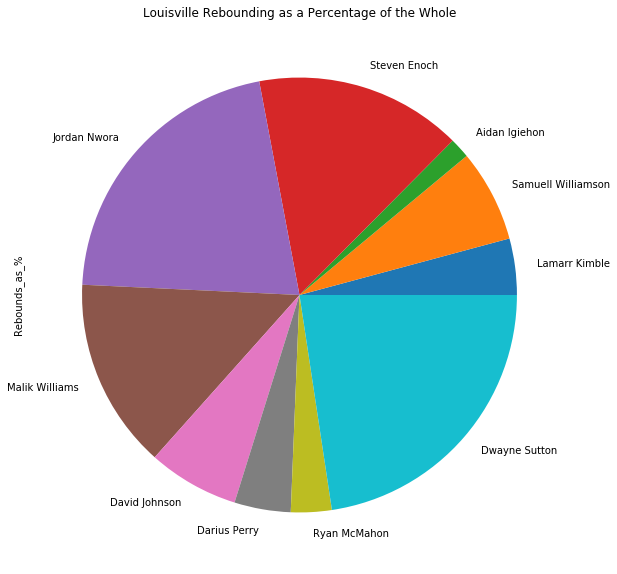

In [22]:
plot = new.plot.pie(y='Rebounds_as_%', figsize=[18, 10], title="Louisville Rebounding as a Percentage of the Whole")

plt.legend().remove()

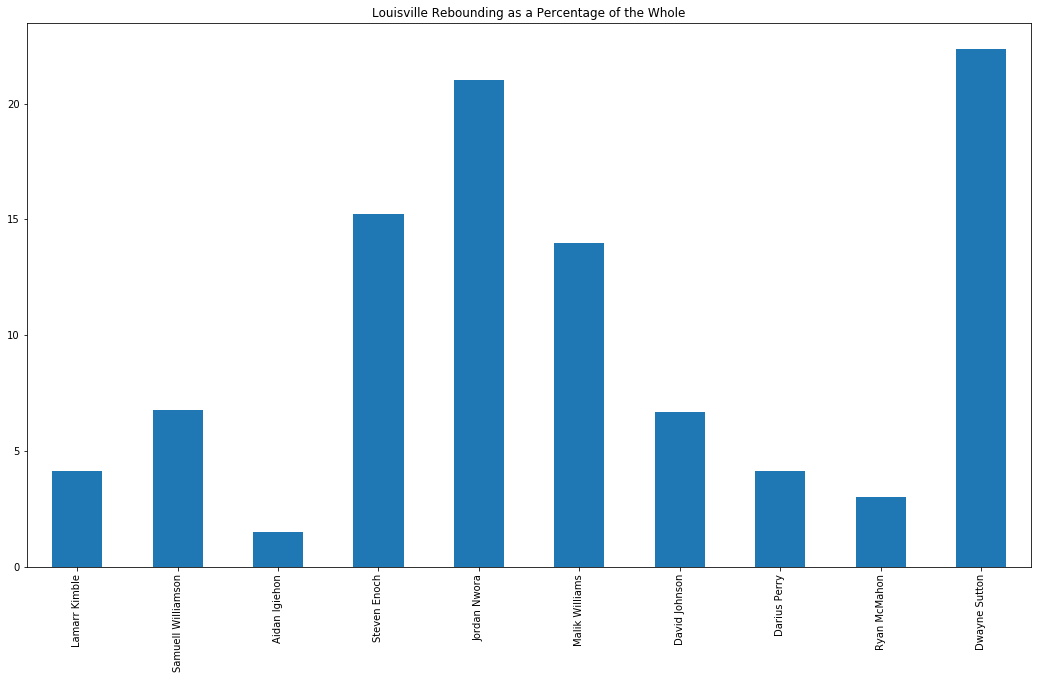

In [15]:
plot = new.plot.bar(y='Rebounds_as_%', figsize=[18, 10], title="Louisville Rebounding as a Percentage of the Whole")

plt.legend().remove()

In [16]:
def insert_player_pts(a):
    percentage = player_dict[a]['total']['points'] / data['own_record']['total']['points'] * 100
    rebs_message = ("The total percentage of Louisville's points by " + a + " is: %" + str(round(percentage, 2)))
    return rebs_message

In [17]:
for player in players:
    print(insert_player_pts(player))

The total percentage of Louisville's points by Lamarr Kimble is: %6.79
The total percentage of Louisville's points by Josh Nickelberry is: %0.52
The total percentage of Louisville's points by Samuell Williamson is: %5.97
The total percentage of Louisville's points by Aidan Igiehon is: %0.57
The total percentage of Louisville's points by Jae'Lyn Withers is: %0.0
The total percentage of Louisville's points by Steven Enoch is: %12.76
The total percentage of Louisville's points by Hogan Orbaugh is: %0.0
The total percentage of Louisville's points by Grant Williams is: %0.0
The total percentage of Louisville's points by Keith Oddo is: %0.26
The total percentage of Louisville's points by Jordan Nwora is: %24.3
The total percentage of Louisville's points by Malik Williams is: %9.58
The total percentage of Louisville's points by David Johnson is: %7.45
The total percentage of Louisville's points by Darius Perry is: %7.06
The total percentage of Louisville's points by Quinn Slazinski is: %0.65


In [18]:
def insert_player_TOs(a):
    percentage = player_dict[a]['total']['turnovers'] / data['own_record']['total']['turnovers'] * 100
    tos_message = ("The total percentage of Louisville's turnovers by " + a + " is: %" + str(round(percentage, 2)))
    return tos_message

In [19]:
for player in players:
    print(insert_player_TOs(player))

The total percentage of Louisville's turnovers by Lamarr Kimble is: %12.53
The total percentage of Louisville's turnovers by Josh Nickelberry is: %0.27
The total percentage of Louisville's turnovers by Samuell Williamson is: %9.33
The total percentage of Louisville's turnovers by Aidan Igiehon is: %1.07
The total percentage of Louisville's turnovers by Jae'Lyn Withers is: %0.0
The total percentage of Louisville's turnovers by Steven Enoch is: %11.2
The total percentage of Louisville's turnovers by Hogan Orbaugh is: %0.0
The total percentage of Louisville's turnovers by Grant Williams is: %0.0
The total percentage of Louisville's turnovers by Keith Oddo is: %0.0
The total percentage of Louisville's turnovers by Jordan Nwora is: %17.33
The total percentage of Louisville's turnovers by Malik Williams is: %4.53
The total percentage of Louisville's turnovers by David Johnson is: %13.6
The total percentage of Louisville's turnovers by Darius Perry is: %11.2
The total percentage of Louisville